## Framingham Heart Study


![Image](https://www.bumc.bu.edu/files/2013/08/framingham-heart-study.jpg)

is a long-term, ongoing cardiovascular cohort study of residents of Framingham, Massachusetts. It began in 1948 with 5,209 adult subjects and is now on its third generation of participants. The study has been instrumental in understanding the epidemiology of hypertensive or arteriosclerotic cardiovascular disease and has contributed to the common knowledge concerning heart disease, including the effects of diet, exercise, and medications like aspirin. The study is a project of the National Heart, Lung, and Blood Institute, in collaboration with Boston University.

## Source of data: Kaggle.com

![Image](https://cdn.prod.website-files.com/5fc212183117036dc3c635d0/611f5ebe2709f0744c0f4413_Sourcing%20talent%20on%20Kaggle%20image.png)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn


In [2]:
df = pd.read_csv("data/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


### The target: 
> a prediction of whether a participant is estimated to develop Coronary Heart Disease (CHD) within 10 years.

In [4]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

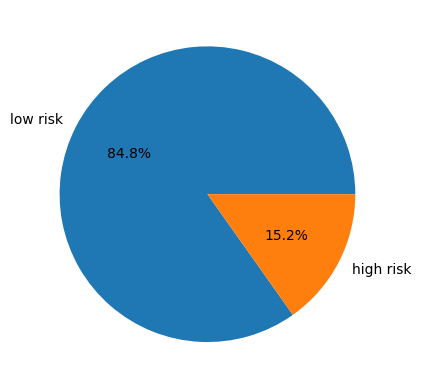

In [5]:
plt.pie(x=df['TenYearCHD'].value_counts(), labels=['low risk','high risk'], autopct='%1.1f%%');

### The features:

##### Education:

1: Less than High School (Did not complete 12th grade)

2: High School Graduate/GED (Completed 12th grade or passed the GED test)

3: Some College/Vocational School (Attended college or vocational school but did not earn a 4-year degree)

4: College Graduate (Earned at least a 4-year bachelor's degree)

#### Smoking => cigsPerDay

In [6]:
# how many null values in cigsPerDay?
df["cigsPerDay"].isnull().sum()


np.int64(29)

In [7]:
df["cigsPerDay"].value_counts()

cigsPerDay
0.0     2144
20.0     734
30.0     217
15.0     210
10.0     143
9.0      130
5.0      121
3.0      100
40.0      80
1.0       67
43.0      56
25.0      55
35.0      22
6.0       18
2.0       18
7.0       12
60.0      11
8.0       11
4.0        9
18.0       8
17.0       7
50.0       6
23.0       6
11.0       5
12.0       3
45.0       3
13.0       3
16.0       3
14.0       2
19.0       2
38.0       1
29.0       1
70.0       1
Name: count, dtype: int64

>replace all nulls in (cigsPerDay) with 0, the most common value.

In [8]:
df['cigsPerDay'] = df['cigsPerDay'].isna().astype(int)
df['cigsPerDay'] = df['cigsPerDay'].fillna(0).astype(int)
df["cigsPerDay"].isnull().sum()

np.int64(0)

#### Total cholesterol

In [9]:
df["totChol"].isnull().sum()


np.int64(50)

<Axes: xlabel='totChol', ylabel='Count'>

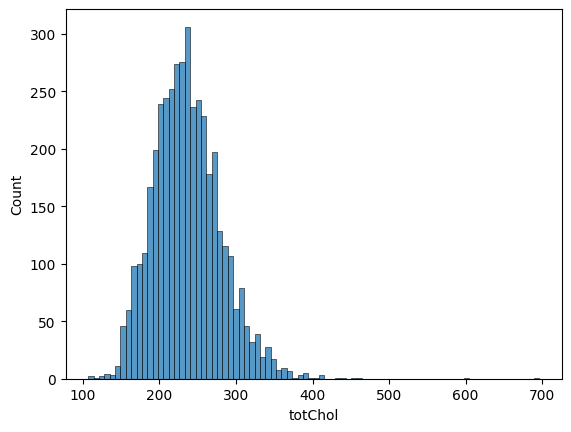

In [10]:
sns.histplot(df["totChol"]) # good distribution, can replace nulls with mean

>replace all 50 nulls with mean (thanks to the good distribution of the values)

In [11]:
df['totChol'] = df['totChol'].isna().astype(int)
totChol_mean = df['totChol'].mean() 
df['totChol'] = df['totChol'].fillna(totChol_mean).astype(int)
df["totChol"].isnull().sum()

np.int64(0)

#### Obesity => BMI

<Axes: xlabel='BMI', ylabel='Count'>

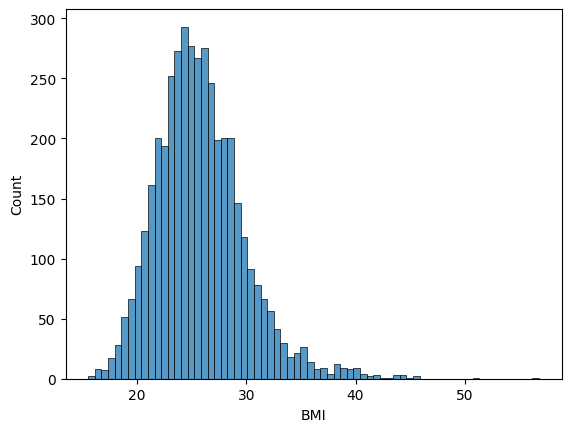

In [12]:
df["BMI"].isnull().sum()
sns.histplot(df["BMI"]) # not very good distribution,  rt skewed a bit, can replace nulls with median

> replace all nulls with median as the curve above is rt-skewed.

In [13]:
df['BMI'] = df['BMI'].isna().astype(int)
BMI_median = df['BMI'].median() 
df['BMI'] = df['BMI'].fillna(BMI_median).astype(int)
df["BMI"].isnull().sum()

np.int64(0)

#### Glucose level

In [14]:
df["glucose"].isnull().sum()

np.int64(388)

In [15]:
df[(df["glucose"].isnull()) & (df["TenYearCHD"] == 0)].shape[0]

338

> All 338 values will be removed as they will not worsen the imbalanced target.

In [16]:
df = df[~((df["glucose"].isnull()) & (df["TenYearCHD"] == 0))]
df["glucose"].isnull().sum()

np.int64(50)

<Axes: xlabel='glucose', ylabel='Count'>

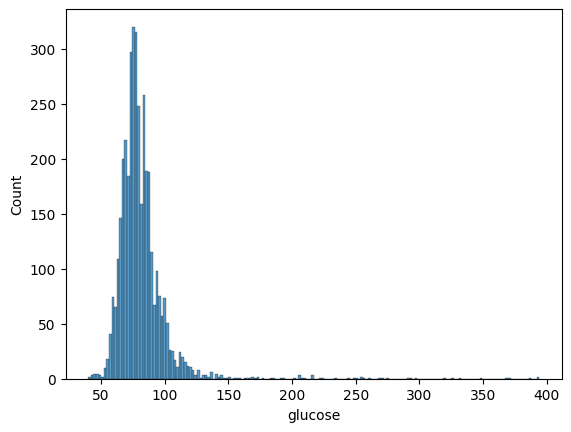

In [17]:
sns.histplot(df["glucose"])

> replace the remaining 50 nulls with median due to the rt-skewed data.

In [18]:
df['glucose'] = df['glucose'].isna().astype(int)
glucose_median = df["glucose"].median()
df['glucose'] = df['glucose'].fillna(glucose_median).astype(int)
df["glucose"].isnull().sum()

np.int64(0)

#### Medications for hypertension

In [19]:
df['BPMeds'] = df['BPMeds'].fillna(0).astype(int) # 0, the most common value
df["BPMeds"].isnull().sum()

np.int64(0)

#### Education

In [20]:
df[(df["education"].isnull()) & (df["TenYearCHD"] == 0)].shape[0]

82

In [21]:
df = df[~((df["education"].isnull()) & (df["TenYearCHD"] == 0))]# will remove from the 0s
df["education"].isnull().sum()

np.int64(16)

<Axes: xlabel='education', ylabel='Count'>

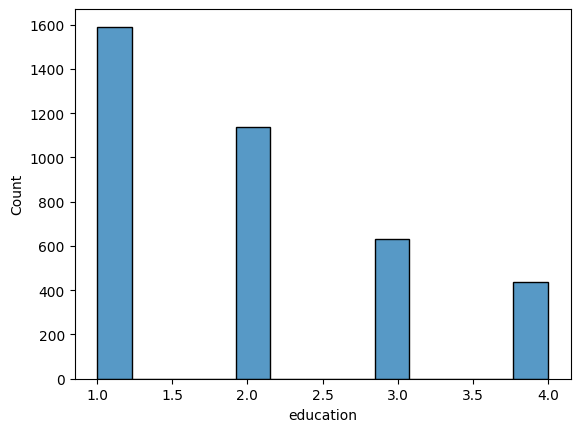

In [22]:
sns.histplot(df["education"])

In [23]:
df['education'] = df['education'].fillna(1).astype(int) # 1 is the most common value
df["education"].isnull().sum()

np.int64(0)

In [24]:
df = df.dropna(subset=["heartRate"])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3817 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3817 non-null   int64  
 1   age              3817 non-null   int64  
 2   education        3817 non-null   int64  
 3   currentSmoker    3817 non-null   int64  
 4   cigsPerDay       3817 non-null   int64  
 5   BPMeds           3817 non-null   int64  
 6   prevalentStroke  3817 non-null   int64  
 7   prevalentHyp     3817 non-null   int64  
 8   diabetes         3817 non-null   int64  
 9   totChol          3817 non-null   int64  
 10  sysBP            3817 non-null   float64
 11  diaBP            3817 non-null   float64
 12  BMI              3817 non-null   int64  
 13  heartRate        3817 non-null   float64
 14  glucose          3817 non-null   int64  
 15  TenYearCHD       3817 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 506.9 KB


<Axes: >

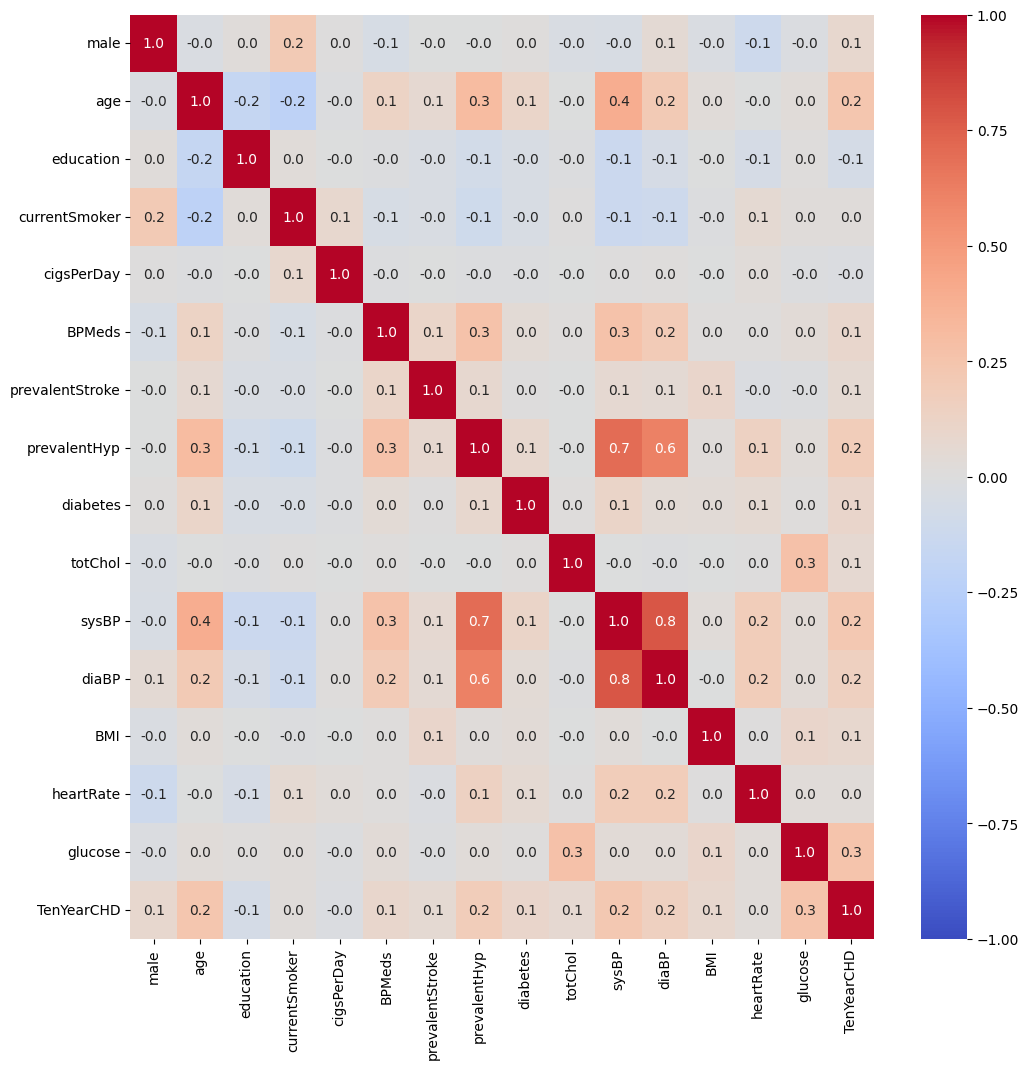

In [26]:
plt.figure (figsize = (12, 12))
sns.heatmap(df.corr(), annot = True,  cmap = "coolwarm", vmin = -1, fmt =".1f")

In [27]:
df.to_csv("data/framingham_cleaned.csv", index = False)


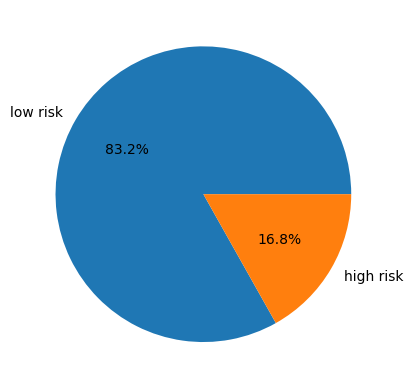

In [28]:
plt.pie(x=df['TenYearCHD'].value_counts(), labels=['low risk','high risk'], autopct='%1.1f%%');